<a href="https://colab.research.google.com/github/mlcow/islr_experiments/blob/master/Linear%20Regression%20Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

#Linear Regression Notes

- Nan loss happens
  - Just implies your a learning rate that is out of control
  - Decrease the learning rate till loss in successive steps starts to decrease
- Too small learning rate
  - Takes forever to learn, the result will be approximately close

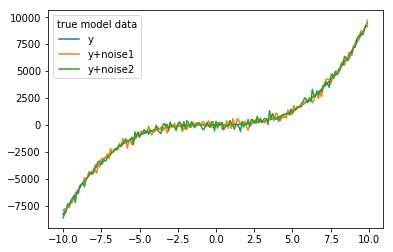

In [0]:
def true_model(x):
  return 10 + 2*x + 7*x**2 + 9*x**3 # (10 + 2*x + 7*x**2 + x**3)

def noise(x):
  return np.random.normal(loc=0.0, scale=250.0, size=x.shape)

def population(x):
  return true_model(x) + noise(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, true_model(x), label="y")
plt.plot(x, population(x), label="y+noise1")
plt.plot(x, population(x), label="y+noise2")
plt.legend(title="true model data")

In [0]:
def model_fn(features, labels, mode, params):
  order = params.get("order")
  b = tf.get_variable("b", shape=[1], dtype=tf.float32, initializer=tf.zeros_initializer)
  w = tf.get_variable("w", shape=[1, order], dtype=tf.float32)
  print b
  print w
  print features
  print labels
  #print "A>>>", tf.matmul(features, w)
  
  preds = b + tf.reduce_sum(features * w, axis=-1)
  
  print "P", preds
  
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(
      train_op = None,
      loss = None,
      predictions = {"x": features, "preds": preds, 'coeff': tf.convert_to_tensor(w), 'b': tf.convert_to_tensor(b) },
      mode=mode
    )
  
  error = labels - preds
  print "E", error
  loss = tf.reduce_mean(error**2)
  
  train_op = tf.group(tf.train.GradientDescentOptimizer(params.get('lr')).minimize(loss),
                      tf.assign_add(tf.train.get_global_step(), 1))
  
  if mode == tf.estimator.ModeKeys.TRAIN:
    return tf.estimator.EstimatorSpec(
      train_op = train_op,
      loss = loss,
      predictions = preds,
      mode= mode
    )

In [0]:
def run_model_with_params_and_plot(lr, log_steps, num_epochs):
    try:
        estimator = tf.estimator.Estimator(model_fn=model_fn, params={"order": 3, "lr": lr},
                                           config=tf.estimator.RunConfig(log_step_count_steps=log_steps))

        def feature_vector(x, order):
          return np.transpose(np.stack([x**i for i in range(1, order+1)])).astype(np.float32)

        x = np.arange(-10, 10, 0.1)
        y = population(x)

        estimator.train(input_fn=tf.estimator.inputs.numpy_input_fn(feature_vector(x, 3), y.astype(np.float32),
                                                                    batch_size = x.shape[0],
                                                                    num_epochs=num_epochs, shuffle=True))

        gen = estimator.predict(input_fn=tf.estimator.inputs.numpy_input_fn(feature_vector(x, 3), y.astype(np.float32),
                                                                    batch_size = 1,
                                                                    num_epochs=1, shuffle=False))

        res = []
        # Collect output
        for i in gen:
            _y = i['preds']
            res.append(_y)
            # print _x, _y, true_model(_x), _y - true_model(_x), i['b'], i['coeff']
            
        plt.plot(x, y)
        plt.plot(x, res)
    except:
        print "\x1b[31m\"{}\"\x1b[0m".format("Failed with error")

In [0]:
run_model_with_params_and_plot(1e-3, 10, 100)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1140f1350>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 10, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpajFw2a', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CPU

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x102cc3390>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 10, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmppgJ2GQ', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CPU

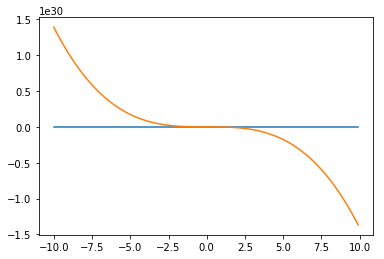

In [0]:
run_model_with_params_and_plot(1e-5, 10, 100)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1140f1850>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmp7Lv2eL', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CP

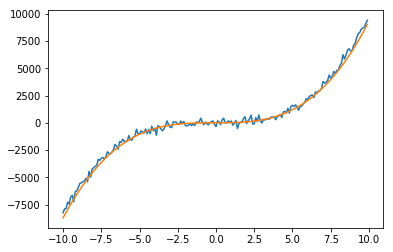

In [0]:
run_model_with_params_and_plot(1e-6, 100, 100)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11430ee50>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpxXYe4P', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CP

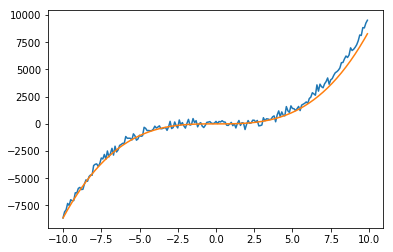

In [0]:
run_model_with_params_and_plot(1e-7, 100, 100)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1152f8990>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpWU1iD1', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CP

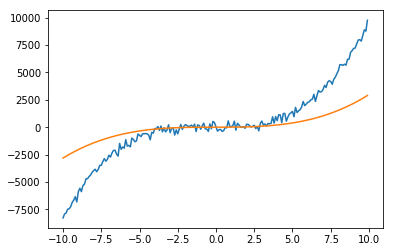

In [0]:
run_model_with_params_and_plot(1e-8, 100, 100)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1156c67d0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpzI5xf9', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CP

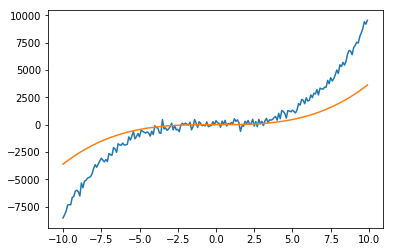

In [0]:
run_model_with_params_and_plot(1e-8, 100, 200)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x115a2ce90>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmp48rFQ3', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CP

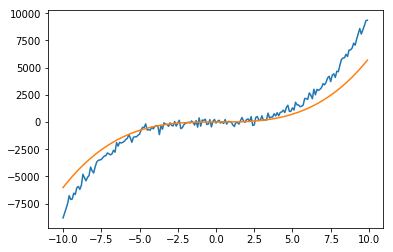

In [0]:
run_model_with_params_and_plot(1e-8, 100, 400)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x114f87510>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmp_YZERu', '_train_distribute': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'w:0' shape=(1, 3) dtype=float32_ref>
Tensor("random_shuffle_queue_DequeueUpTo:1", shape=(?, 3), dtype=float32, device=/device:CPU:0)
Tensor("random_shuffle_queue_DequeueUpTo:2", shape=(?,), dtype=float32, device=/device:CP

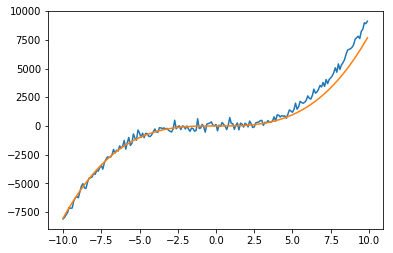

In [0]:
run_model_with_params_and_plot(1e-8, 100, 800)